# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data =[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    #print(i)
    #print(city)
    #break  
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    #break 

    record_count +=1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    #break
#city_weather

        # Parse out latitude, londitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                           })
       
        # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #break
    # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
#print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tzaneen
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | severo-yeniseyskiy
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | mossel bay
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | kisvarda
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ikovka
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | usogorsk
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | waingapu
Processing Record 15 of Set 1 | poronaysk
Processing Record 16 of Set 1 | senanga
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | port moresby
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | thompson
Process

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)                       
# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tzaneen,-23.8332,30.1635,19.26,91,73,0.73,ZA,1702004976
1,port-aux-francais,-49.3500,70.2167,4.49,85,97,15.54,TF,1702004976
2,naze,28.3667,129.4833,17.57,58,0,2.53,JP,1702004976
3,severo-yeniseyskiy,60.3725,93.0408,-31.90,93,100,1.34,RU,1702004977
4,port alfred,-33.5906,26.8910,16.77,87,11,1.34,ZA,1702004977
5,mossel bay,-34.1831,22.1460,18.39,82,0,6.65,ZA,1702004977
6,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,77,75,4.00,RU,1702004978
7,kisvarda,48.2167,22.0833,-2.53,98,77,1.59,HU,1702004978
8,yellowknife,62.4560,-114.3525,-15.90,95,100,2.24,CA,1702004978
9,ikovka,55.6089,64.9375,-26.08,93,6,1.68,RU,1702004979


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tzaneen,-23.8332,30.1635,19.26,91,73,0.73,ZA,1702004976
1,port-aux-francais,-49.3500,70.2167,4.49,85,97,15.54,TF,1702004976
2,naze,28.3667,129.4833,17.57,58,0,2.53,JP,1702004976
3,severo-yeniseyskiy,60.3725,93.0408,-31.90,93,100,1.34,RU,1702004977
4,port alfred,-33.5906,26.8910,16.77,87,11,1.34,ZA,1702004977


In [9]:
time.strftime("%Y-%m-%d")

'2023-12-07'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

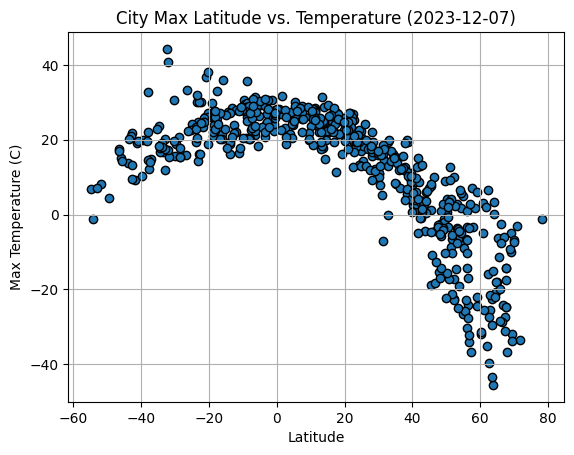

In [12]:
# Build scatter plot for latitude vs. temperature

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x,y, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.grid()

# Save the figure
plt.savefig("../output_data//Fig1.png")

# show plot
plt.show()

#### Observations: 
The City Latitude vs. Temperature scatter plot makes a good representation of the earth's weather.
Cities with higher temperatures cluster around the equator, around 0 degrees, and the temperature drops as
   cities get closer to the earth's north and south poles around 60 and -40 degrees. 


#### Latitude Vs. Humidity

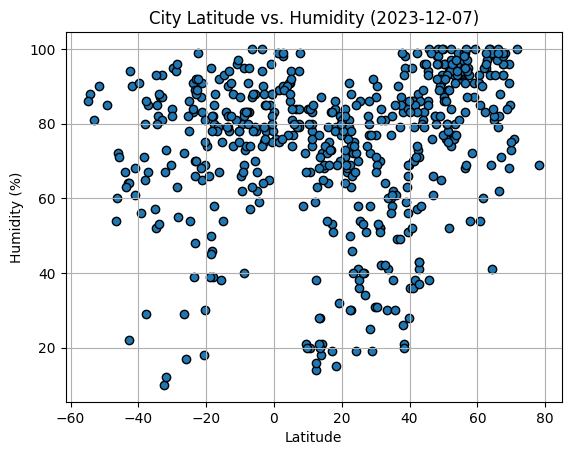

In [13]:
# Build the scatter plots for latitude vs. humidity

x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x,y, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.grid()

# Save the figure
plt.savefig("../output_data//Fig2.png")

# show plot
plt.show()

#### Observations:
The City Latitude vs. Humidity scatter plot shows that there is no appearent correlation between humidity and latitude.
However, we can see that many cities have humidity higher than 60%. 
It seems that there should be different humidity percentage in the summer vs winter.



#### Latitude Vs. Cloudiness


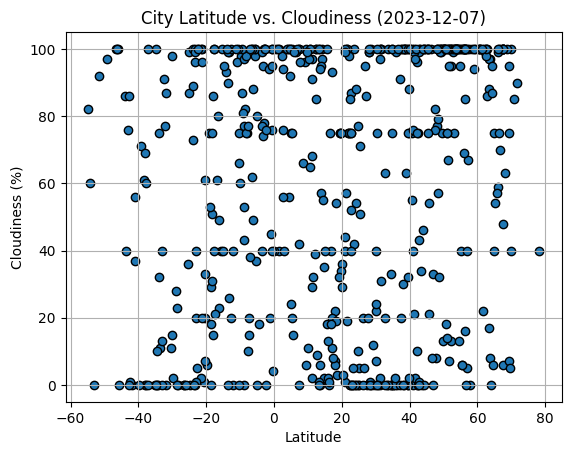

In [14]:
# Build the scatter plots for latitude vs. cloudiness

x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x,y, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.grid()

# Save the figure
plt.savefig("../output_data//Fig3.png")

# show plot
plt.show()

#### Observations:
There is no appearent correlation between Cloudiness and Latitude in the City Latitude vs. Cloudiness scatter plot.
However, we can see some linear cloudiness cluster at 0%, 40% and 100% across all latifudes.

#### Latitude vs. Wind Speed Plot

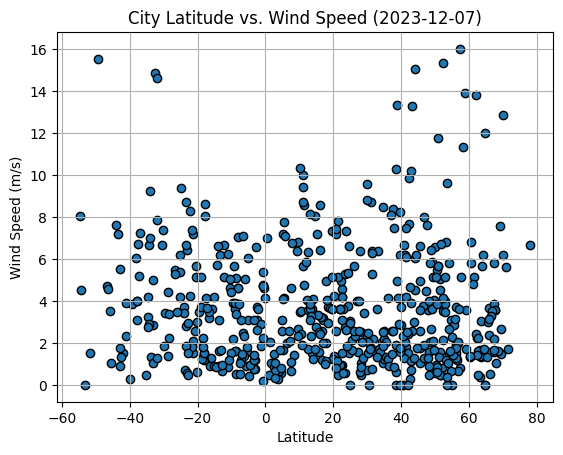

In [15]:
# Build the scatter plots for latitude vs. wind speed

x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x,y, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.grid()

# Save the figure
plt.savefig("../output_data//Fig4.png")

# show plot
plt.show()

#### Observations:
There is no appearent correlation between wind speed and latitude in the City Latitude & Wind Speed scatter plot.
However it appears for most cities the wind speed is less than 10 mph.


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
#def plot_regression(x_value, y_value, x_label, y_label, hemisphere):

    #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    #regress_value = x_value * slope + intercept
    
    #plt.scatter(x_value,y_value)
    #plt.plot(x_value, regress_value, "r-")
    #plt.title(f"{hemisphere}-City {x_label} & {y_label}")
    #plt.xlabel(x_label)
    #plt.ylabel(y_label)
    #line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #plt.annotate(line_eq,xy = (0,-30),fontsize = 14, color = "red")

    #print(f"The r value is: {rvalue}")
    #plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,naze,28.3667,129.4833,17.57,58,0,2.53,JP,1702004976
3,severo-yeniseyskiy,60.3725,93.0408,-31.90,93,100,1.34,RU,1702004977
6,petropavlovsk-kamchatsky,53.0452,158.6483,-3.67,77,75,4.00,RU,1702004978
7,kisvarda,48.2167,22.0833,-2.53,98,77,1.59,HU,1702004978
8,yellowknife,62.4560,-114.3525,-15.90,95,100,2.24,CA,1702004978


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tzaneen,-23.8332,30.1635,19.26,91,73,0.73,ZA,1702004976
1,port-aux-francais,-49.3500,70.2167,4.49,85,97,15.54,TF,1702004976
4,port alfred,-33.5906,26.8910,16.77,87,11,1.34,ZA,1702004977
5,mossel bay,-34.1831,22.1460,18.39,82,0,6.65,ZA,1702004977
10,east london,-33.0153,27.9116,20.22,81,13,2.86,ZA,1702004979


#### Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8675431129477817


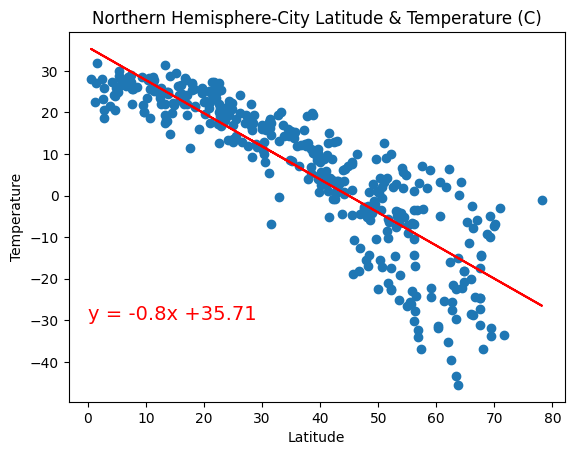

In [35]:
# Linear regression on Northern Hemisphere

x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Northern Hemisphere-City Latitude & Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (0,-30),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()


The r value is: 0.5866230712668136


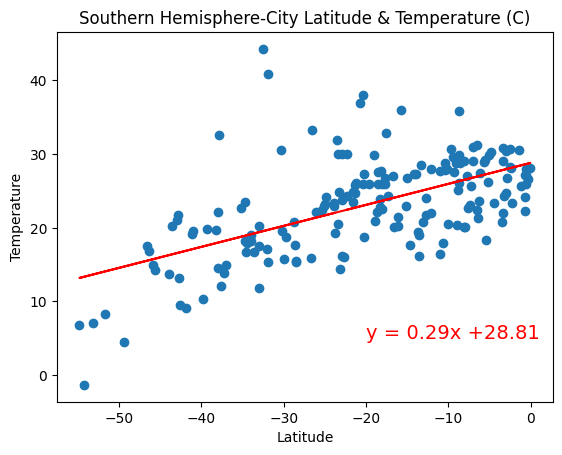

In [37]:
# Linear regression on Southern Hemisphere

x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Southern Hemisphere-City Latitude & Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (-20,5),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()

#### Discussion about the linear relationship: 
Latitude vs. Temperature

Northen Hemisphere:
The regression displays negative relationship between Temperature and Latitude. 
As we move towards North Pole (increase Latitude), temperature decreases.

Southern Hemisphere:
The regression displays positive relationship between Temperature and Latitude.
As we move towards Equator(increase Latitude) from south pole, temperature increases.

#### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.35405445836172783


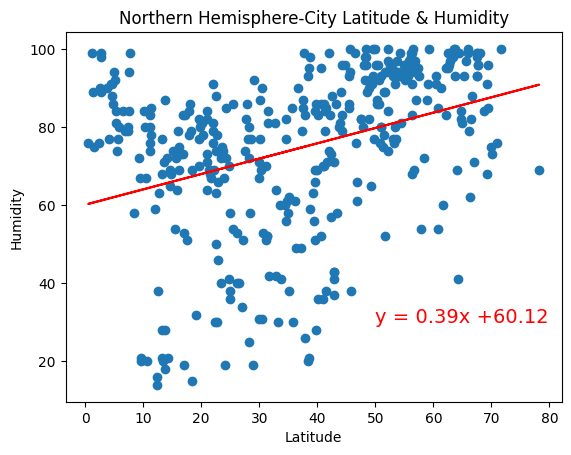

In [39]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Northern Hemisphere-City Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (50,30),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()


The r value is: 0.176918607568383


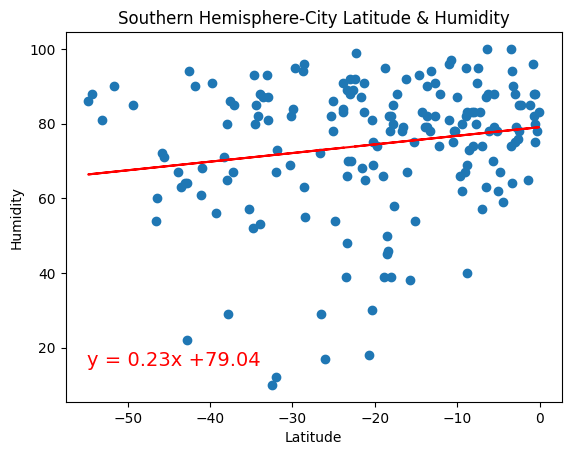

In [42]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Southern Hemisphere-City Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (-55,15),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()

##### Discussion about the linear relationship
Northern Hemisphere:
The Humidity vs. Latitude chart is shown above. 
The relationship is positive, but most of the data is clustered above 60% for humidity.

Southern Hemisphere:
The Humidity vs. Latitude chart is shown above.
The relationship is slightly positive, though there doesn't appear to be a strong correlation between humidity and latitude.


#### Cloudiness vs. Latitude Linear Regression Plot


The r value is: 0.1869049447514513


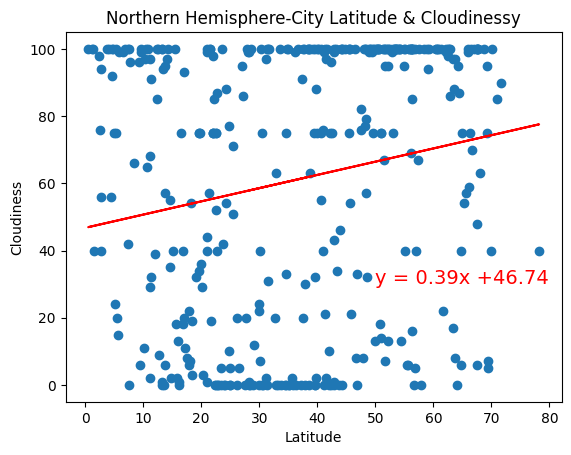

In [43]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Northern Hemisphere-City Latitude & Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (50,30),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()


The r value is: 0.22125878499846513


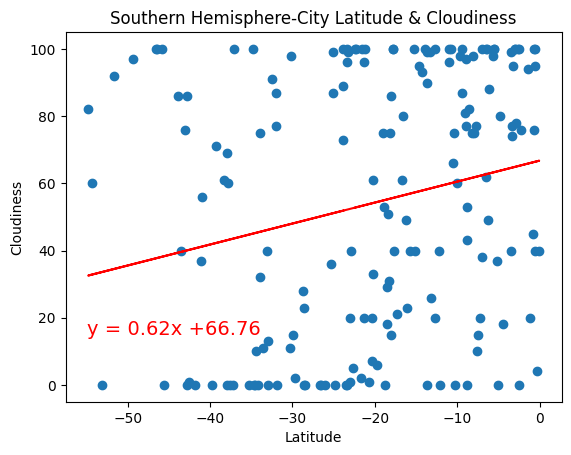

In [44]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Southern Hemisphere-City Latitude & Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (-55,15),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()


##### Discussion about the linear relationship

Northern Hemisphere:
The scatter plot data for Cloudiness Vs. Latitude is scattered all over.
It does not show any correlation between cloudiness and latitude.

Southern Hemisphere:
The scatter plot data for Cloudiness Vs. Latitude is scattered all over.
It does not show any correlation between cloudiness and latitude, still it shows that there are less cloudiness towards south pole.







#### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.022720197758047105


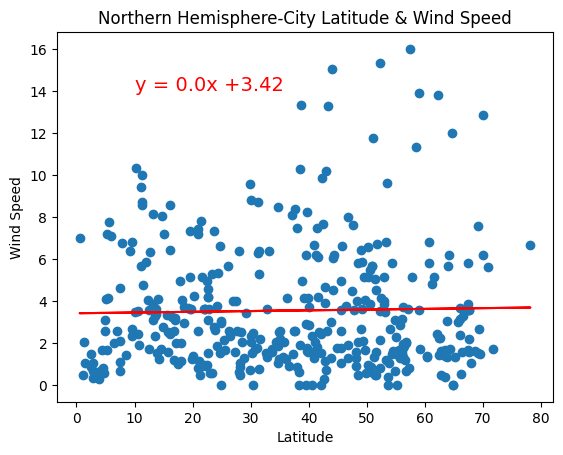

In [48]:
# Northern Hemisphere
x_value = northern_hemi_df["Lat"]
y_value = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Northern Hemisphere-City Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (10,14),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()


The r value is: -0.22942325351874343


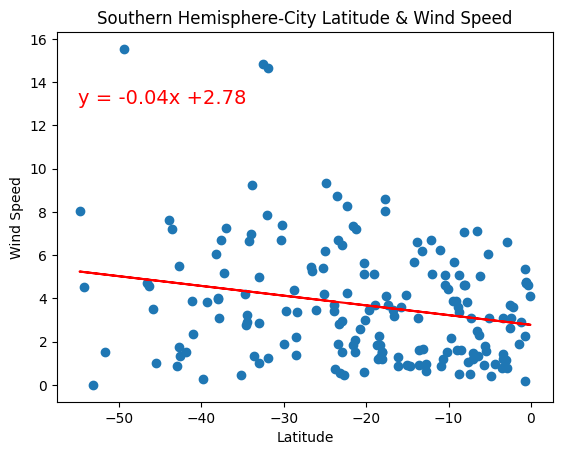

In [49]:
# Southern Hemisphere
x_value = southern_hemi_df["Lat"]
y_value = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept

plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
plt.title(f"Southern Hemisphere-City Latitude & Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,xy = (-55,13),fontsize = 14, color = "red")

print(f"The r value is: {rvalue}")
plt.show()

##### Discussion about the linear relationship

Northern Hemisphere:
The scatter plot is shown above for Wind Speed Vs. Latitude.
There is not appear to be correlation between latitude and wind speed.

Southern Hemisphere:
he scatter plot is shown above for Wind Speed Vs. Latitude.
There is not appear to be correlation between latitude and wind speed.